<a href="https://colab.research.google.com/github/1chrizty/kochi-tourism-and-event-forecating/blob/main/Kerala_Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report

# Ensure graphs display well
plt.rcParams['figure.figsize'] = (10,5)

In [4]:
# 2. UPLOAD AND READ THE CSV FILE
df = pd.read_csv('/content/kochi_tourism_full_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Year,Month,Event,Event_Type,Total_Tourist_Arrivals,Domestic_Tourists,International_Tourists,Hotel_Occupancy(%),Average_Stay_Duration(days),...,Rainfall(mm),Flight_Delays,Monsoon_Impact_Flag,Most_Visited_Place,Agency_or_Package,Lag_1_Month,Lag_3_Month,Lag_6_Month,Moving_Average,Seasonal_Index
0,2023-02-22,2023,2,Onam Festival,Festival,52632,40525,12107,62.96,2.99,...,141.00,12,0,Chottanikkara Temple,Government Package,51284,53678,35841,48358,1.15
1,2022-07-09,2022,7,Wedding Season,MICE,58711,42327,16384,93.70,2.19,...,466.97,45,1,Lulu Mall,Self-Planned,63059,48756,52828,55838,0.87
2,2024-08-13,2024,8,No Major Event,NaN,102990,78618,24372,50.01,1.83,...,251.83,9,0,Mattancherry Palace,Self-Planned,98961,94563,90436,96737,1.07
3,2024-05-16,2024,5,Cruise Season,Cruise Tourism,94867,70281,24586,81.34,1.78,...,397.93,5,1,Hill Palace,Travel Group,96155,88970,105025,96254,0.87
4,2024-01-08,2024,1,Cruise Season,Cruise Tourism,55370,44141,11229,90.45,3.60,...,459.81,14,1,Marine Drive,Private Agency,51213,46758,74656,56999,1.16


In [5]:
print('Shapes: ',df.shape)
print(df.dtypes)

Shapes:  (1500, 24)
Date                           datetime64[ns]
Year                                    int64
Month                                   int64
Event                                  object
Event_Type                             object
Total_Tourist_Arrivals                  int64
Domestic_Tourists                       int64
International_Tourists                  int64
Hotel_Occupancy(%)                    float64
Average_Stay_Duration(days)           float64
Tourism_Revenue(INR)                  float64
Cruise_Arrivals                         int64
Airport_Footfall                        int64
Temperature(C)                        float64
Rainfall(mm)                          float64
Flight_Delays                           int64
Monsoon_Impact_Flag                     int64
Most_Visited_Place                     object
Agency_or_Package                      object
Lag_1_Month                             int64
Lag_3_Month                             int64
Lag_6_Month   

In [6]:
#summary statistics
df.describe()

,Date,Year,Month,Total_Tourist_Arrivals,Domestic_Tourists,International_Tourists,Hotel_Occupancy(%),Average_Stay_Duration(days),Tourism_Revenue(INR),Cruise_Arrivals,Airport_Footfall,Temperature(C),Rainfall(mm),Flight_Delays,Monsoon_Impact_Flag,Lag_1_Month,Lag_3_Month,Lag_6_Month,Moving_Average,Seasonal_Index
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2023-06-26 16:04:48.000000256,2022.968000,6.723333,90875.124667,63799.593333,27075.531333,73.268720,3.456033,1.887194e+08,642.178667,102336.677333,28.447360,300.714360,24.036667,0.502000,90913.874667,90783.778667,90578.470000,90787.431333,0.998240
min,2022-01-01 00:00:00,2022.000000,1.000000,50035.000000,30599.000000,10649.000000,50.010000,1.500000,6.188192e+07,20.000000,53725.000000,24.000000,0.080000,0.000000,0.000000,46107.000000,40636.000000,30162.000000,43875.000000,0.800000
25%,2022-09-29 18:00:00,2022.000000,4.000000,70496.250000,49656.000000,20237.000000,62.465000,2.460000,1.358679e+08,90.000000,82643.750000,26.210000,150.237500,11.000000,0.000000,71090.000000,70980.000000,71460.250000,70806.750000,0.900000
50%,2023-06-22 00:00:00,2023.000000,7.000000,90796.500000,63069.000000,26017.000000,73.595000,3.410000,1.772920e+08,162.000000,102010.500000,28.410000,301.190000,24.000000,1.000000,91363.000000,90238.000000,91383.500000,90509.000000,1.000000
75%,2024-03-21 00:00:00,2024.000000,10.000000,111181.750000,77188.750000,33023.750000,84.652500,4.472500,2.354483e+08,1038.000000,122721.500000,30.692500,456.580000,36.000000,1.000000,111425.750000,111087.750000,110319.500000,110835.000000,1.100000
max,2024-12-31 00:00:00,2024.000000,12.000000,129993.000000,102733.000000,51627.000000,94.890000,5.500000,3.872460e+08,2986.000000,147968.000000,32.990000,599.550000,49.000000,1.000000,134397.000000,138567.000000,148870.000000,136379.000000,1.200000
std,NaN,0.803787,3.422465,23108.152310,17052.658847,8865.527059,12.997356,1.160560,6.811938e+07,859.658160,23802.225210,2.616403,174.370283,14.502260,0.500163,23293.983091,23807.264799,25163.137628,23150.754184,0.115116


In [7]:
#missing values
df.isnull().sum()

,0
Date,0
Year,0
Month,0
Event,0
Event_Type,155
Total_Tourist_Arrivals,0
Domestic_Tourists,0
International_Tourists,0
Hotel_Occupancy(%),0
Average_Stay_Duration(days),0



===== TOURIST SUMMARY =====
Total Tourists: 136312687
Domestic Tourists: 95699390
International Tourists: 40613297


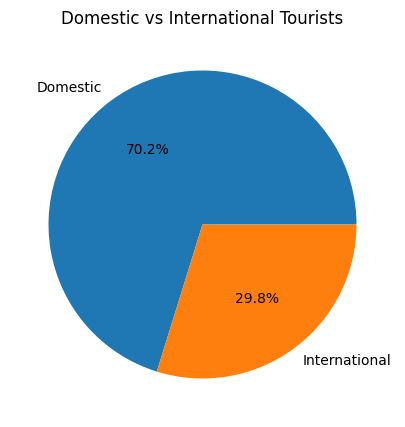

In [ ]:
# 3. BASIC TOURIST STATISTICS
total = df['Total_Tourist_Arrivals'].sum()
domestic = df['Domestic_Tourists'].sum()
international = df['International_Tourists'].sum()

print("\n===== TOURIST SUMMARY =====")
print("Total Tourists:", total)
print("Domestic Tourists:", domestic)
print("International Tourists:", international)

# Graph: Pie chart
plt.figure()
plt.pie([domestic, international], labels=['Domestic', 'International'], autopct='%1.1f%%')
plt.title("Domestic vs International Tourists")
plt.show()


===== TOP 10 MOST VISITED PLACES =====
Most_Visited_Place
Bolgatty Palace         17218677
Fort Kochi              17124190
Lulu Mall               16311068
Hill Palace             15676770
Chinese Fishing Nets    15071928
Marine Drive            14587033
Mattancherry Palace     13873716
Cherai Beach            13619864
Chottanikkara Temple    12829441
Name: Total_Tourist_Arrivals, dtype: int64


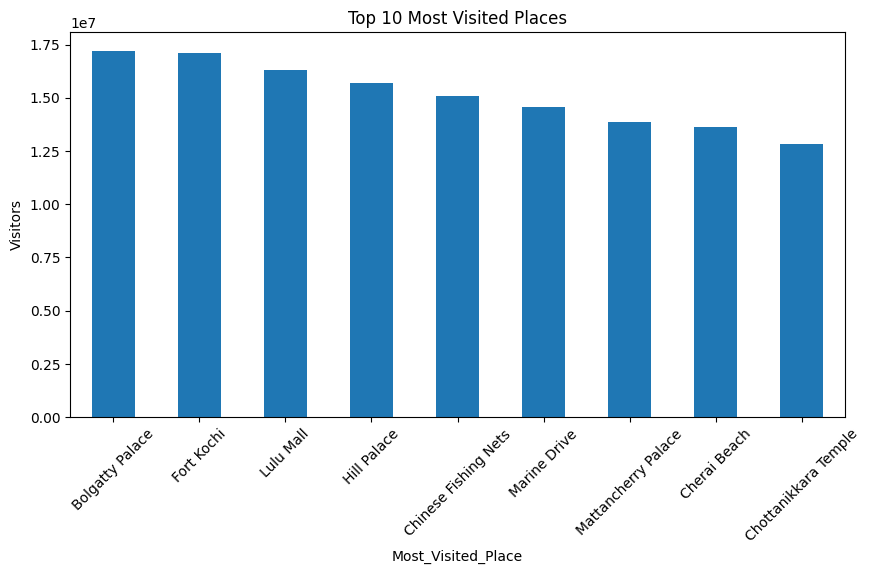

In [ ]:
# 4. TOP 10 MOST VISITED PLACES
top_places = (
    df.groupby('Most_Visited_Place')['Total_Tourist_Arrivals']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\n===== TOP 10 MOST VISITED PLACES =====")
print(top_places)

plt.figure()
top_places.plot(kind='bar')
plt.title("Top 10 Most Visited Places")
plt.xlabel("Most_Visited_Place")
plt.ylabel("Visitors")
plt.xticks(rotation=45)
plt.show()


===== EVENT TYPE COUNTS =====
Event_Type
MICE               382
Festival           199
Arts & Cultural    198
Low Season         195
Cruise Tourism     189
Tourism            182
Name: count, dtype: int64


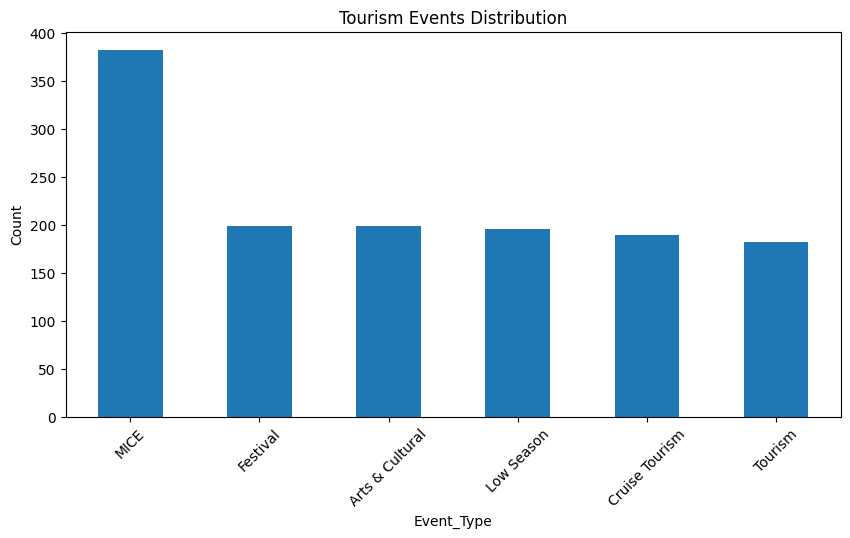

In [ ]:
# 5. EVENT ANALYSIS
event_count = df['Event_Type'].value_counts()

print("\n===== EVENT TYPE COUNTS =====")
print(event_count)

plt.figure()
event_count.plot(kind='bar')
plt.title("Tourism Events Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


===== MONTHLY TOURIST ARRIVALS =====
Month
1      9943485
2      9345526
3     10788949
4     12451552
5     12333946
6     10342900
7     11917086
8     11463129
9     11674351
10    11582641
11    11886746
12    12582376
Name: Total_Tourist_Arrivals, dtype: int64


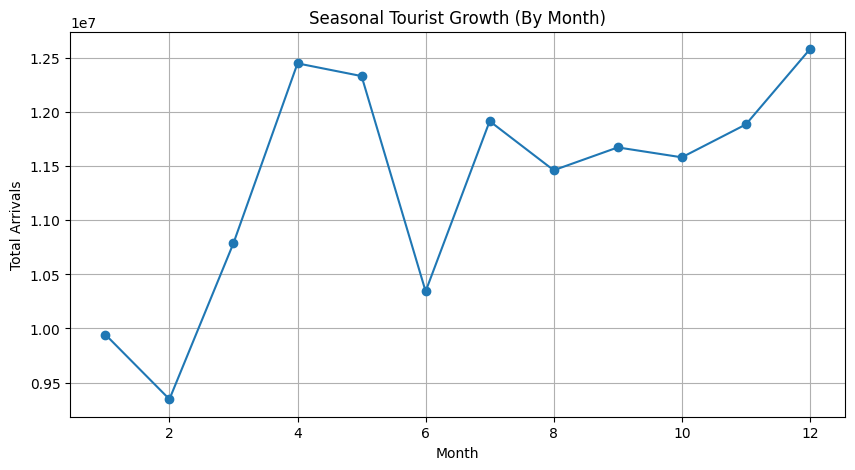

In [ ]:
# 6. SEASONAL GROWTH ANALYSIS
monthly_growth = df.groupby('Month')['Total_Tourist_Arrivals'].sum()

print("\n===== MONTHLY TOURIST ARRIVALS =====")
print(monthly_growth)

plt.figure()
monthly_growth.plot(marker='o')
plt.title("Seasonal Tourist Growth (By Month)")
plt.xlabel("Month")
plt.ylabel("Total Arrivals")
plt.grid()
plt.show()

In [ ]:
# 7. REALISTIC REVENUE MODEL

df['Domestic_Estimate'] = df['Total_Tourist_Arrivals'] * 0.85
df['International_Estimate'] = df['Total_Tourist_Arrivals'] * 0.15

domestic_spend = 3500
intl_spend = 12000
cruise_spend = 8000

df["Estimated_Revenue"] = (
    df['Domestic_Estimate'] * domestic_spend +
    df['International_Estimate'] * intl_spend +
    df['Cruise_Arrivals'] * cruise_spend
)

# MODEL INPUTS
X_rev = df[['Total_Tourist_Arrivals', 'Cruise_Arrivals', 'Hotel_Occupancy(%)', 'Month']]
y_rev = df['Estimated_Revenue']

X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

rev_model = RandomForestRegressor()
rev_model.fit(X_trainR, y_trainR)

# YEARLY TOTAL
past_revenue = df.groupby('Year')['Estimated_Revenue'].sum().astype(int)

print("\nRevenue for Past Years:\n")
print(past_revenue.apply(lambda x: f"₹{x:,}"))



Revenue for Past Years:

Year
2022    ₹221,669,431,875
2023    ₹234,514,996,200
2024    ₹202,414,796,350
Name: Estimated_Revenue, dtype: object


In [ ]:
# 8. FUTURE TOURIST ARRIVAL PREDICTION
print("\n===== TOURISM GROWTH PREDICTION =====")

X = df[['Year']]
y = df['Total_Tourist_Arrivals']

model = LinearRegression()
model.fit(X, y)

user_year = int(input("Enter a future year to predict total tourist arrivals: "))
predicted_value = model.predict([[user_year]])[0]

print(f"\nPredicted tourist arrivals in {user_year}: {int(predicted_value)} visitors")



===== TOURISM GROWTH PREDICTION =====
Enter a future year to predict total tourist arrivals: 2026

Predicted tourist arrivals in 2026: 91941 visitors


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 9. REVENUE FORECAST FOR UPCOMING YEAR

def predict_revenue_for_year():
    """
    Ask user for a target year and predict revenue for that year
    using synthetic month-wise averages derived from the dataset.
    """

    try:
        Year = int(input("Enter the year you want to predict revenue for (e.g., 2025): "))

        # Compute dataset averages for synthetic future months
        avg_vals = {
            'Total_Tourist_Arrivals': df['Total_Tourist_Arrivals'].mean(),
            'Cruise_Arrivals': df['Cruise_Arrivals'].mean(),
            'Hotel_Occupancy(%)': df['Hotel_Occupancy(%)'].mean()
        }

        # Generate 12 months of synthetic data
        future_data = pd.DataFrame({
            'Total_Tourist_Arrivals': [avg_vals['Total_Tourist_Arrivals']] * 12,
            'Cruise_Arrivals': [avg_vals['Cruise_Arrivals']] * 12,
            'Hotel_Occupancy(%)': [avg_vals['Hotel_Occupancy(%)']] * 12,
            'Month': list(range(1, 13))
        })

        # Predict revenue month-wise using the RandomForest revenue model
        predicted_monthly_revenue = rev_model.predict(future_data)

        # Sum of all 12 months = yearly revenue
        total_year_revenue = int(predicted_monthly_revenue.sum())

        print(f"\nPredicted Revenue for {Year}: ₹{total_year_revenue:,}")

        # return total_year_revenue

    except ValueError:
        print("Invalid input. Please enter a valid year.")
        return None


# Run the yearly revenue prediction
predict_revenue_for_year()


Enter the year you want to predict revenue for (e.g., 2025): 2026

Predicted Revenue for 2026: ₹5,259,889,173



===== Tourist Satisfaction Prediction ====
              precision    recall  f1-score   support

     Average       0.24      0.32      0.28        71
   Excellent       0.19      0.16      0.17        74
        Good       0.27      0.23      0.25        73
        Poor       0.26      0.26      0.26        82

    accuracy                           0.24       300
   macro avg       0.24      0.24      0.24       300
weighted avg       0.24      0.24      0.24       300



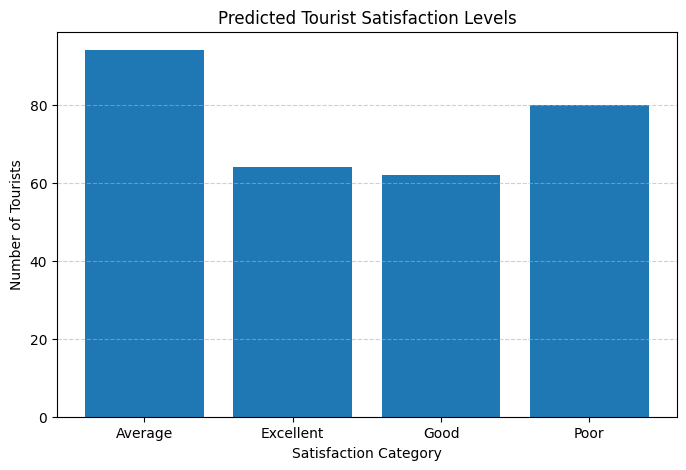

In [ ]:
# 10. TOURIST SATISFACTION PREDICTOR
np.random.seed(42)
df["Satisfaction"] = np.random.choice(["Poor", "Average", "Good", "Excellent"], len(df))

X_sat = df[['Hotel_Occupancy(%)', 'Rainfall(mm)', 'Total_Tourist_Arrivals']]
y_sat = df['Satisfaction']

X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_sat, y_sat, test_size=0.2, random_state=42)

sat_model = RandomForestClassifier()
sat_model.fit(X_trainS, y_trainS)

print("\n===== Tourist Satisfaction Prediction ====")
y_predS = sat_model.predict(X_testS)
print(classification_report(y_testS, y_predS))


# Count predicted satisfaction categories
satisfaction_counts = pd.Series(y_predS).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(satisfaction_counts.index, satisfaction_counts.values)
plt.title("Predicted Tourist Satisfaction Levels")
plt.xlabel("Satisfaction Category")
plt.ylabel("Number of Tourists")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# 11. IMPROVED SMART TOURISM RECOMMENDATION ENGINE

def smart_tourism_recommend(row):
    rec = []

    # 1. Rainfall issues → Poor satisfaction
    if row["Rainfall(mm)"] > 200:
        rec.append("High rainfall detected → Develop rain-safe tourism packages, indoor activities, and real-time weather assistance.")
    elif row["Rainfall(mm)"] < 50:
        rec.append("Low rainfall season → Promote outdoor tourism festivals and adventure activities.")

    # 2. Hotel occupancy insights
    if row["Hotel_Occupancy(%)"] > 85:
        rec.append("Hotel occupancy extremely high → Increase room supply, promote homestays, and encourage new hotel investments.")
    elif row["Hotel_Occupancy(%)"] < 40:
        rec.append("Low hotel occupancy → Launch discount campaigns, off-season promotions, and improve service quality.")

    # 3. Tourist mix (Domestic vs International)
    dom = row["Domestic_Tourists"]
    intl = row["International_Tourists"]

    if dom > intl * 1.5:
        rec.append("Tourist mix dominated by domestic visitors → Strengthen international marketing and global partnerships.")
    elif intl > dom * 1.3:
        rec.append("High international arrivals → Improve multilingual guides, airport assistance, and cultural tourism offerings.")

    # 4. Cruise arrivals
    if row["Cruise_Arrivals"] > 500:
        rec.append("High cruise traffic → Expand cruise terminal capacity, baggage systems, and shuttle connectivity.")
    elif 100 < row["Cruise_Arrivals"] <= 500:
        rec.append("Moderate cruise arrivals → Enhance tourist information centers at ports.")

    # 5. Total tourist pressure
    if row["Total_Tourist_Arrivals"] > 2_000_000:
        rec.append("Tourist volumes extremely high → Implement crowd management, digital ticketing, and sustainable tourism practices.")
    elif row["Total_Tourist_Arrivals"] < 800_000:
        rec.append("Tourist arrivals low → Boost promotions, festivals, influencer campaigns.")

    # 6. Seasonal satisfaction risk detector
    if row["Rainfall(mm)"] > 180 and row["Hotel_Occupancy(%)"] > 70:
        rec.append("Risk of poor satisfaction due to rain + high occupancy → Deploy additional staff, offer flexible itineraries.")

    # DEFAULT
    if len(rec) == 0:
        rec.append("Tourism conditions stable — Maintain current marketing and service strategies.")

    return rec


# SAMPLE USAGE
sample = df.iloc[0]
print("\n===== Improved Recommendations for Sample =====")
for r in smart_tourism_recommend(sample):
    print("•", r)



===== Improved Recommendations for Sample =====
• Tourist mix dominated by domestic visitors → Strengthen international marketing and global partnerships.
• Moderate cruise arrivals → Enhance tourist information centers at ports.
• Tourist arrivals low → Boost promotions, festivals, influencer campaigns.
